**Importing data**

In [1]:
# Enable making data frames
import pandas as pd

# Importing numpy
import numpy as np

In [2]:
# Importing raw tweets
tweets_raw = pd.read_csv('https://raw.githubusercontent.com/MariaRosendal/Tesla-tweets/main/tweets.csv')

In [3]:
# Let's have a look
tweets_raw.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1328458535340949505,1328428879334297600,2020-11-16 22:02:51 UTC,2020-11-16,22:02:51,0,44196397,elonmusk,Elon Musk,NaN,@Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶,en,[],[],[],1148,3448,66981,[],[],https://twitter.com/elonmusk/status/1328458535...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Maisie_Williams', 'name': 'M...",NaN,NaN,NaN,NaN
1,1328451518010327042,1328143001697230848,2020-11-16 21:34:57 UTC,2020-11-16,21:34:57,0,44196397,elonmusk,Elon Musk,NaN,@Kristennetten 😉,und,[],[],[],100,37,2203,[],[],https://twitter.com/elonmusk/status/1328451518...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Kristennetten', 'name': 'K10...",NaN,NaN,NaN,NaN
2,1328424097110323200,1328352029190877185,2020-11-16 19:46:00 UTC,2020-11-16,19:46:00,0,44196397,elonmusk,Elon Musk,NaN,"@WhatsupFranks @michaelmina_lab CureVac, Moder...",en,[],[],[],72,75,1090,[],[],https://twitter.com/elonmusk/status/1328424097...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'WhatsupFranks', 'name': 'fra...",NaN,NaN,NaN,NaN
3,1328421992144355328,1328352029190877185,2020-11-16 19:37:38 UTC,2020-11-16,19:37:38,0,44196397,elonmusk,Elon Musk,NaN,@michaelmina_lab Creating synthetic mRNA for c...,en,[],[],[],96,90,1221,[],[],https://twitter.com/elonmusk/status/1328421992...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'michaelmina_lab', 'name': 'M...",NaN,NaN,NaN,NaN
4,1328419837656276992,1328338500064845825,2020-11-16 19:29:04 UTC,2020-11-16,19:29:04,0,44196397,elonmusk,Elon Musk,NaN,@gaertner_anne @Neuro_Skeptic @DresdenTea @jud...,tl,[],[],[],55,32,1412,[],[],https://twitter.com/elonmusk/status/1328419837...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'gaertner_anne', 'name': 'Ann...",NaN,NaN,NaN,NaN


In [4]:
tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10230 entries, 0 to 10229
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10230 non-null  int64  
 1   conversation_id  10230 non-null  int64  
 2   created_at       10230 non-null  object 
 3   date             10230 non-null  object 
 4   time             10230 non-null  object 
 5   timezone         10230 non-null  int64  
 6   user_id          10230 non-null  int64  
 7   username         10230 non-null  object 
 8   name             10230 non-null  object 
 9   place            0 non-null      float64
 10  tweet            10230 non-null  object 
 11  language         10230 non-null  object 
 12  mentions         10230 non-null  object 
 13  urls             10230 non-null  object 
 14  photos           10230 non-null  object 
 15  replies_count    10230 non-null  int64  
 16  retweets_count   10230 non-null  int64  
 17  likes_count 

In [5]:
tweets_raw.describe().round(2)

,id,conversation_id,timezone,user_id,place,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.023000e+04,1.023000e+04,10230.0,10230.0,0.0,10230.00,10230.00,10230.00,10230.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.093816e+18,1.091027e+18,0.0,44196397.0,NaN,557.39,2226.22,19569.01,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.653157e+17,1.701199e+17,0.0,0.0,NaN,1932.38,10115.00,59726.37,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.675167e+17,1.659576e+09,0.0,44196397.0,NaN,0.00,0.00,57.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000081e+18,9.993676e+17,0.0,44196397.0,NaN,47.00,44.00,1018.25,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.119283e+18,1.117901e+18,0.0,44196397.0,NaN,110.00,129.00,2625.50,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.238623e+18,1.237239e+18,0.0,44196397.0,NaN,376.00,858.50,11936.25,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.328459e+18,1.328429e+18,0.0,44196397.0,NaN,47526.00,372865.00,1638662.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
elon_musk = tweets_raw.loc[:,['date', 'username', 'tweet', 'replies_count', 'retweets_count', 'likes_count']]
elon_musk.head()

,date,username,tweet,replies_count,retweets_count,likes_count
0,2020-11-16,elonmusk,@Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶,1148,3448,66981
1,2020-11-16,elonmusk,@Kristennetten 😉,100,37,2203
2,2020-11-16,elonmusk,"@WhatsupFranks @michaelmina_lab CureVac, Moder...",72,75,1090
3,2020-11-16,elonmusk,@michaelmina_lab Creating synthetic mRNA for c...,96,90,1221
4,2020-11-16,elonmusk,@gaertner_anne @Neuro_Skeptic @DresdenTea @jud...,55,32,1412


In [7]:
# Make dates to datetime format
elon_musk['date'] = pd.to_datetime(elon_musk.date)

In [8]:
#Set the date as index
elon_musk.set_index('date', inplace=True)

# Exploratory data analysis

In [9]:
# Import packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

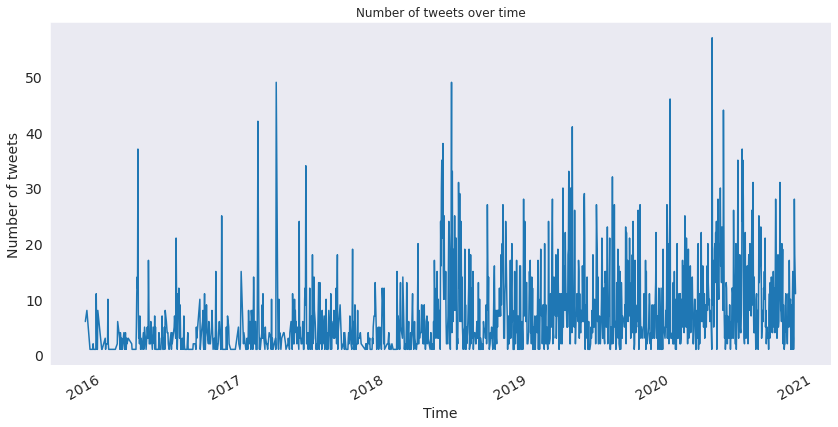

In [10]:
# Visualizing tweets over time
elon_musk.groupby('date').tweet.count().plot(figsize=(14, 7), fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Number of tweets", fontsize=14)
plt.title("Number of tweets over time")
plt.show()

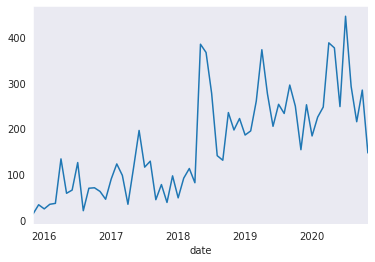

In [11]:
# Visualizaing likes over time
elon_musk.resample('M').count()['likes_count'].plot()

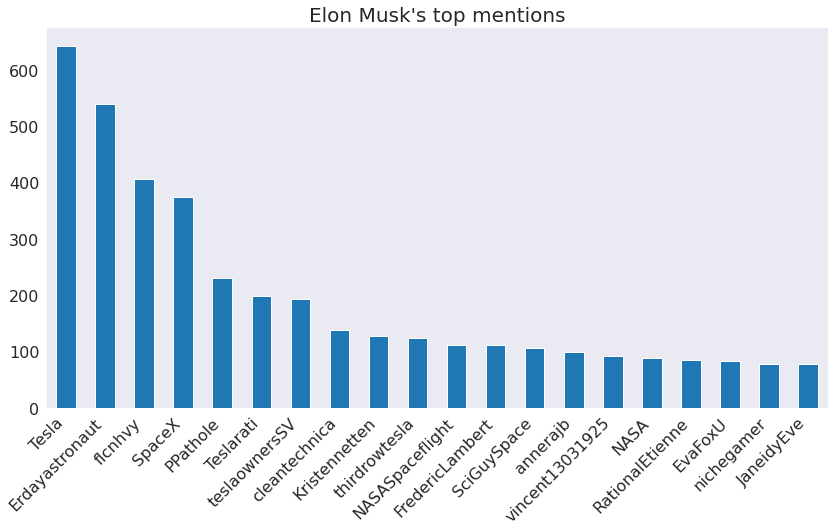

In [12]:
# Elon Musk's top mentions in his tweets
import itertools
c = list(
itertools.chain(
    *elon_musk.tweet.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist()))
pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16)
plt.gca().set_title("Elon Musk's top mentions", fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass

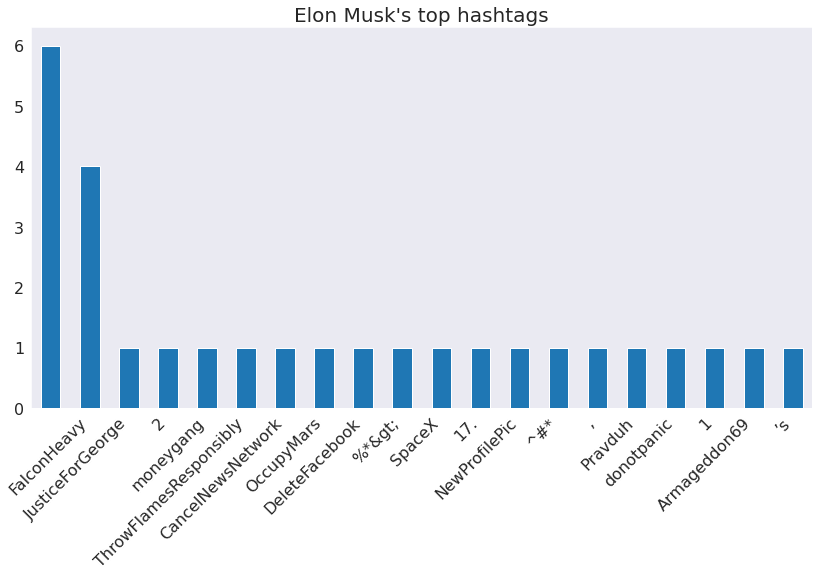

In [13]:
# Elon Musk's top hashtags in his tweets
import itertools
c = list(
itertools.chain(
    *elon_musk.tweet.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '#' in handle.replace(":", "")]).tolist()))
pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16)
plt.gca().set_title("Elon Musk's top hashtags", fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass

# Preprocessing of tweets for sentiment analysis

**Removing lowest retweeted tweets**

In [14]:
# Number of tweets before removing bottom 10% retweeted tweets per year
elon_musk.shape

(10230, 5)

In [15]:
# Removing bottom 10% tweets with the least retweets per year (as they have been seen by few and will have little effect on the stock price)

# Defining x for when tweets are retweeted may than bottom 10% retweets (for every year)
for year in elon_musk.index.year:
  x = (elon_musk.retweets_count > elon_musk.retweets_count.quantile(0.1))

# Create column with top retweets (True if rows are to be keept)
elon_musk['top_retweets'] = x

# Keep only top tweets with most retweets (i.e removing rows with bottom 10% retweets)
elon_musk = elon_musk[elon_musk['top_retweets'] == True].copy()

## Remove top retweets column (no longer needed)
elon_musk.drop('top_retweets', axis=1, inplace=True)

In [16]:
# Number of tweets after removing bottom 10% retweeted tweets per year
elon_musk.shape

(9144, 5)

**Tweet preprocessing**

In [ ]:
#Importring nltk
import nltk

# Importing tweet preprocessor
!pip install tweet-preprocessor
import preprocessor as p

In [18]:
# Setting options for the cleaner to delete from the tweet
p.set_options(p.OPT.RESERVED, p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG)

In [19]:
# Cleaning the tweets
elon_musk['tweet_clean'] = [p.clean(tweet) for tweet in elon_musk['tweet']]

In [20]:
# Remove amp
elon_musk['tweet_clean'] = elon_musk['tweet_clean'].replace('&amp;','', regex=True)

Note: We keep punctuations, upper cases and smileys/emojies as they have an effect on sentiment analysis. Furthermore, lemmatization and tokenization are not needed for Vader.

In [21]:
#Removing empty rows in tweet_clean_string
elon_musk['tweet_clean'].replace("",float("NaN"), inplace=True)

elon_musk.dropna(subset = ['tweet_clean'], inplace=True)

In [22]:
elon_musk.head()

,username,tweet,replies_count,retweets_count,likes_count,tweet_clean
date,,,,,,
2020-11-16,elonmusk,@Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶,1148,3448,66981,🎶 Toss a bitcoin to ur Witcher 🎶
2020-11-16,elonmusk,@Kristennetten 😉,100,37,2203,😉
2020-11-16,elonmusk,"@WhatsupFranks @michaelmina_lab CureVac, Moder...",72,75,1090,"CureVac, Moderna a few others. Tesla makes th..."
2020-11-16,elonmusk,@michaelmina_lab Creating synthetic mRNA for c...,96,90,1221,Creating synthetic mRNA for cures/vaccines is ...
2020-11-16,elonmusk,@gaertner_anne @Neuro_Skeptic @DresdenTea @jud...,55,32,1412,Haha


# Sentiment analysis

We used sentiment analysis (Vader) in NLP as it identifies the emotive state of Elon Musk's tweets. The score can be "positive", "neutral" or "negative". In this way it served as an indication of Musk’s emotion for the day, which will later be compared to the movement in the Tesla stock behaviour for the following day.

In [29]:
# Too apply the sentiment score for each day we firstly concatenate the tweets on the same day
elon_musk_daily = pd.DataFrame(elon_musk.groupby(elon_musk.index).tweet_clean.apply('. '.join))
elon_musk_daily.columns =['conc_tweet']

In [ ]:
!pip install twython

In [ ]:
# Importing sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [32]:
# Generating sentiment scores for each tweet and a compound score (including all scores)

analyzer = SentimentIntensityAnalyzer()

elon_musk_daily['neg_sentiment'] = elon_musk_daily['conc_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
elon_musk_daily['neu_sentiment'] = elon_musk_daily['conc_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
elon_musk_daily['pos_sentiment'] = elon_musk_daily['conc_tweet'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
elon_musk_daily['compound_sentiment'] = elon_musk_daily['conc_tweet'].apply(lambda x:analyzer.polarity_scores(x)['compound'])


In [34]:
#Let's see how many rows we have now
elon_musk_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1344 entries, 2015-11-20 to 2020-11-16
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   conc_tweet          1344 non-null   object 
 1   neg_sentiment       1344 non-null   float64
 2   neu_sentiment       1344 non-null   float64
 3   pos_sentiment       1344 non-null   float64
 4   compound_sentiment  1344 non-null   float64
dtypes: float64(4), object(1)
memory usage: 63.0+ KB


In [35]:
# We now drop all rows that are neither classified as neg, neu or pos (as they would only create noise in the model)
elon_musk_daily = elon_musk_daily[~((elon_musk_daily.neg_sentiment == 0) & (elon_musk_daily.neu_sentiment == 0) & (elon_musk_daily.pos_sentiment == 0))]

#Let's have a look at the dataframe again
elon_musk_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1341 entries, 2015-11-20 to 2020-11-16
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   conc_tweet          1341 non-null   object 
 1   neg_sentiment       1341 non-null   float64
 2   neu_sentiment       1341 non-null   float64
 3   pos_sentiment       1341 non-null   float64
 4   compound_sentiment  1341 non-null   float64
dtypes: float64(4), object(1)
memory usage: 62.9+ KB


In [36]:
#Also adding the number of tweets per day (later used as an explanatory variable)

# Number of tweets per day
elon_musk_daily['tweets_count'] = elon_musk.groupby(elon_musk.index).tweet.count()

In [37]:
elon_musk_daily

,conc_tweet,neg_sentiment,neu_sentiment,pos_sentiment,compound_sentiment,tweets_count
date,,,,,,
2015-11-20,"Sounds perfect, you had me at ""enterprise"".. Y...",0.078,0.726,0.196,0.8481,6
2015-11-24,"Yep, good points. I hope you get back into spa...",0.020,0.821,0.158,0.9545,8
2015-12-02,About to give a talk at the Sorbonne,0.000,1.000,0.000,0.0000,1
2015-12-03,Good summary of my talk in Paris on climate ch...,0.000,0.756,0.244,0.4404,1
2015-12-04,Nice ride! Looking forward to seeing you tomor...,0.000,0.694,0.306,0.4753,1
...,...,...,...,...,...,...
2020-11-12,🤣🤣👍. 4 Astronauts fly to on Sat night from Cap...,0.000,0.714,0.286,0.8020,3
2020-11-13,This a great reference! Worth a read.. Case cl...,0.070,0.757,0.173,0.9967,28
2020-11-14,"Cool, but please be super cautious. Expect two...",0.038,0.796,0.165,0.9884,16


In [38]:
# Identifying the final number of observations that will be used in the machine learning models
elon_musk_daily.shape

(1341, 6)

## Exploring negative and positive words

To sense check if the sentiment classification worked we can explore the tweets that was defined as negative and postive. 

We can do this be finding the tweets that was characterized as negative (when compound score is < -0.05) and postive (when compound score is >0.05). If these tweets contain negative and positive words respectively, this is an indicator of the model working.

In [39]:
# Define a DataFrame with negative and positive words 
neg_words = pd.DataFrame(elon_musk_daily[elon_musk_daily.compound_sentiment < -0.05]['conc_tweet'])
pos_words = pd.DataFrame(elon_musk_daily[elon_musk_daily.compound_sentiment > 0.05]['conc_tweet'])

In [40]:
# Setting column width
pd.set_option('display.max_colwidth', 500)

In [101]:
# Identifying positive tweets (chosen randomly to obtain tweets from each year)
pos_words.iloc[[1, 55, 200, 500, 700, 900],:]

,conc_tweet
date,
2015-11-24,"Yep, good points. I hope you get back into space some day!. But credit for 1st reusable suborbital rocket goes to X-15 And Burt Rutan for commercial. Jeff maybe unaware SpaceX suborbital VTOL flight began 2013. Orbital water landing 2014. Orbital land landing next.. Not quite ""rarest"". SpaceX Grasshopper rocket did 6 suborbital flights 3 years ago is still around.. The F9 booster can reach low orbit as a single stage if not carrying the upper stage and a heavy satellite.. Getting to space n..."
2016-06-01,Good summary of Tesla annual meeting by
2017-07-03,"Wanted to say thanks to all that own or ordered a Tesla. It matters to us that you took a risk on a new car company. We won't forget.. Looks like we can reach 20,000 Model 3 cars per month in Dec. Handover party for first 30 customer Model 3's on the 28th! Production grows exponentially, so Aug should be 100 cars and Sept above 1500.. Model 3 passed all regulatory requirements for production two weeks ahead of schedule. Expecting to complete SN1 on Friday"
2018-12-26,"Definitely. All major highways in Texas will have Superchargers, all the way to Brownsville across Mexico.. Yes. Yes. Supercharger coverage will extend to 100% of Europe next year. From Ireland to Kiev, from Norway to Turkey.. Most people don’t know that the Tesla Supercharger network allows easy long distance travel throughout USA, most of Europe, Canada and China. We are dramatically increasing Tesla Superchargers within cities working with landlords to add home charging to apartment bui..."
2019-09-18,"Whoa cool. “Smart” Summon will work on all v2.0+ hardware in wide release. L'Ambroisie, Place des Vosges. Nice. Amazingly, this is not an Onion article. Je ne regrette Etienne. Lane offset should be much better in V10.0. Yes. Told you AI was dangerous!! 🔥💣💦. In other news …"
2020-05-29,"Worth noting that, as of Jan 1, Tesla buyers no longer received any federal tax credit. Model 3 led despite this disadvantage.. We slowed down a bit to allow Supercharger V3 production to get going, but now will speed up!. More Superchargers coming soon!"


In [161]:
# Identifiyng negative words (chosen randomly to obtain tweets from each year)
neg_words.iloc[[1, 30, 55, 70, 115, 135],:]

,conc_tweet
date,
2015-12-18,Rounding up to 1 sec for a bit of timing margin. Updating flight computer command sequence …. Aborted on ignition timing due to slow ground side valve. Adjusting ignition sequence by 0.6 secs for next attempt.. About 2 mins from static fire. holding for issue resolution. Abort triggered by flight computer on upper stage throttle valve. Adjusting thresholds and restarting count at T-10 mins.. 5 mins from static fire test. -340 F in this case. Deep cryo increases density and amplifies rocket p...
2016-10-10,"Not actually based on science. Objective data shows Autopilot is safer than manually driven cars.. Utter nonsense. Empirical evidence is what matters, not random speculation.. Good for Germany!. That's why we need to accelerate solar power. Real fraud going on is denial of climate science. As for ""subsidies"", Tesla gets pennies on dollar vs coal. How about we both go to zero?. Coal-mining CEO: 'Tesla is a fraud' via. Translating what actually happened in the debates..."
2017-07-30,"I'm sure there are better answers than what I do, which is just take the pain and make sure you really care about what you're doing. If you buy a ticket to hell, it isn't fair to blame hell .... Maybe not medically tho. Dunno. Bad feelings correlate to bad events, so maybe real problem is getting carried away in what I sign up for.. Yeah. The reality is great highs, terrible lows and unrelenting stress. Don't think people want to hear about the last two.. Model 3 uses two intersecting planes..."
2018-03-03,"Deep in the hole with my boring machine. Sometimes when we touch, the honesty’s too much ..."
2019-05-29,"Yeah, the fear, uncertainty doubt propaganda campaign being pushed by those betting against Tesla has reached new heights. I paid most of my Tesla-related expenses too. Tesla last year was actually net negative comp for me.. One day’s grace, taking into account time zone confusion. Will revert tomorrow.. Edgy move"
2020-03-06,The coronavirus panic is dumb


# Stock preprocessing and visualization

In [ ]:
!pip install pandas-datareader

In [44]:
# Importing packages
import pandas_datareader as dr
from pandas_datareader import data
import matplotlib.pyplot as plt
% matplotlib inline

In [45]:
# Getting the Tesla stock data
tesla = dr.data.get_data_yahoo('tsla', start='2015-11-19', end='2020-11-16')

In [46]:
# Let's have a look
tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-19,45.237999,44.060001,44.108002,44.360001,12522000.0,44.360001
2015-11-20,45.000000,42.716000,44.698002,44.001999,22003500.0,44.001999
2015-11-23,43.835999,42.936001,43.470001,43.549999,12631000.0,43.549999
2015-11-24,44.200001,43.000000,43.074001,43.650002,12401500.0,43.650002
2015-11-25,46.166000,44.076000,44.268002,45.928001,19954000.0,45.928001
...,...,...,...,...,...,...
2020-11-10,420.089996,396.029999,420.089996,410.359985,30284200.0,410.359985
2020-11-11,418.700012,410.579987,416.450012,417.130005,17357700.0,417.130005
2020-11-12,423.000000,409.519989,415.049988,411.760010,19855100.0,411.760010


In [47]:
# Change index column into pandas datetime
tesla.index = pd.to_datetime(tesla.index)

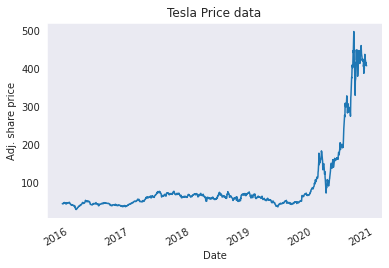

In [49]:
# Visualizing the adjusted close price
tesla['Adj Close'].plot()
plt.xlabel("Date")
plt.ylabel("Adj. share price")
plt.title("Tesla Price data")
plt.show()

In [50]:
# Calculating the daily returns (in %)
tesla['daily_change'] = tesla['Adj Close'].pct_change()*100

In [51]:
# Checking daily returns
print("Tesla daily returns:")
print(tesla['daily_change'].head(10))

Tesla daily returns:
Date
2015-11-19         NaN
2015-11-20   -0.807037
2015-11-23   -1.027225
2015-11-24    0.229626
2015-11-25    5.218785
2015-11-27    0.857858
2015-11-30   -0.582877
2015-12-01    3.009645
2015-12-02   -2.192337
2015-12-03    0.310360
Name: daily_change, dtype: float64


In [52]:
# Creating a column for the daily change that should be predicted (pushing daily change one day back so that these are predicted values)
tesla["daily_change_pred"] = tesla['daily_change'].shift(-1)

In [53]:
# We wish to predict if stock prices increase or decrease. Thus, we transform daily changes to categorical variables

change_categorical = []

for row in tesla['daily_change_pred']:
    if row > 0:
        change_categorical.append('Increase')
    else: 
      change_categorical.append('Decrease')

# OBS: As we only have one neutral observation we set <=0 as a decrease
# in order for our machine learning models to predict this (obtain a binary input)

tesla['change_categorical'] = change_categorical

In [54]:
# Drop NaN values (the first day has no return)
tesla.dropna(inplace=True)

In [55]:
tesla.head(20)

,High,Low,Open,Close,Volume,Adj Close,daily_change,daily_change_pred,change_categorical
Date,,,,,,,,,
2015-11-20,45.000000,42.716000,44.698002,44.001999,22003500.0,44.001999,-0.807037,-1.027225,Decrease
2015-11-23,43.835999,42.936001,43.470001,43.549999,12631000.0,43.549999,-1.027225,0.229626,Increase
2015-11-24,44.200001,43.000000,43.074001,43.650002,12401500.0,43.650002,0.229626,5.218785,Increase
2015-11-25,46.166000,44.076000,44.268002,45.928001,19954000.0,45.928001,5.218785,0.857858,Increase
2015-11-27,46.450001,45.402000,46.212002,46.321999,9747000.0,46.321999,0.857858,-0.582877,Decrease
2015-11-30,46.855999,45.816002,46.358002,46.051998,13299000.0,46.051998,-0.582877,3.009645,Increase
2015-12-01,47.599998,46.209999,46.212002,47.438000,18670000.0,47.438000,3.009645,-2.192337,Decrease
2015-12-02,47.720001,46.245998,47.400002,46.397999,14907500.0,46.397999,-2.192337,0.310360,Increase
2015-12-03,47.490002,46.000000,47.096001,46.542000,14698000.0,46.542000,0.310360,-1.001245,Decrease


## Exploring stock data

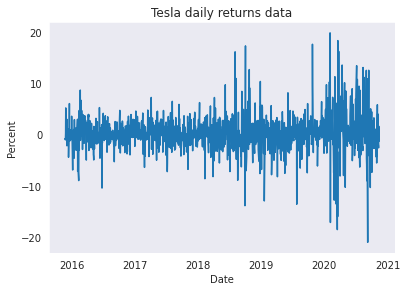

In [56]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(tesla['daily_change'])
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("Tesla daily returns data")
plt.show()

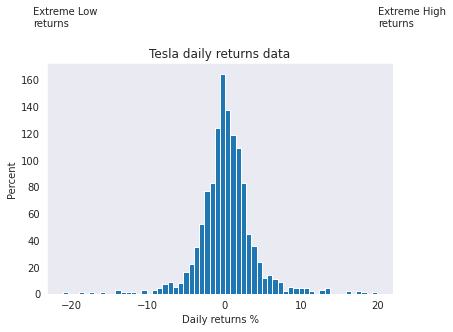

In [57]:
# Plotting the returns in a histogram to get a sense of the distribution
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
tesla['daily_change'].plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Tesla daily returns data")
ax1.text(-25,200,"Extreme Low\nreturns")
ax1.text(20,200,"Extreme High\nreturns")
plt.show()

In [58]:
# Calculating the mean, standard deviation and other stats
tesla.describe()

,High,Low,Open,Close,Volume,Adj Close,daily_change,daily_change_pred
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03,1255.000000,1255.000000,1255.000000
mean,90.836985,86.729767,88.840588,88.871335,4.096326e+07,88.871335,0.241671,0.242234
std,92.855403,87.340588,90.279340,90.236548,2.981708e+07,90.236548,3.599398,3.599289
min,30.993999,28.209999,28.464001,28.733999,3.540000e+06,28.733999,-21.062826,-21.062826
25%,47.104000,45.640999,46.348001,46.430000,2.212325e+07,46.430000,-1.404937,-1.404937
50%,61.689999,59.700001,60.675999,60.799999,3.186850e+07,60.799999,0.121555,0.121555
75%,71.505001,69.410000,70.586998,70.438999,4.799970e+07,70.438999,1.831452,1.831452
max,502.489990,470.510010,502.140015,498.320007,3.046940e+08,498.320007,19.894863,19.894863


# Combining the two dataframes

In [59]:
# The dataframes have different lengths which make sense due to trading days excluding weekends and holidays
# Moreover, there are some business days where there are no tweets
print(elon_musk_daily.shape)
print(tesla.shape)

(1341, 6)
(1255, 9)


In [60]:
# Left merged is used to only include trading days (excl. weekends and holidays)
merged = pd.merge(tesla[['Adj Close', 'change_categorical', 'daily_change_pred', 'Volume', 'daily_change']], elon_musk_daily[['neg_sentiment', 'neu_sentiment','pos_sentiment','compound_sentiment', 'tweets_count']], left_index=True, right_index=True, how='left')

In [61]:
# Let's see what data looks like
merged.head(20)

,Adj Close,change_categorical,daily_change_pred,Volume,daily_change,neg_sentiment,neu_sentiment,pos_sentiment,compound_sentiment,tweets_count
Date,,,,,,,,,,
2015-11-20,44.001999,Decrease,-1.027225,22003500.0,-0.807037,0.078,0.726,0.196,0.8481,6.0
2015-11-23,43.549999,Increase,0.229626,12631000.0,-1.027225,NaN,NaN,NaN,NaN,NaN
2015-11-24,43.650002,Increase,5.218785,12401500.0,0.229626,0.020,0.821,0.158,0.9545,8.0
2015-11-25,45.928001,Increase,0.857858,19954000.0,5.218785,NaN,NaN,NaN,NaN,NaN
2015-11-27,46.321999,Decrease,-0.582877,9747000.0,0.857858,NaN,NaN,NaN,NaN,NaN
2015-11-30,46.051998,Increase,3.009645,13299000.0,-0.582877,NaN,NaN,NaN,NaN,NaN
2015-12-01,47.438000,Decrease,-2.192337,18670000.0,3.009645,NaN,NaN,NaN,NaN,NaN
2015-12-02,46.397999,Increase,0.310360,14907500.0,-2.192337,0.000,1.000,0.000,0.0000,1.0
2015-12-03,46.542000,Decrease,-1.001245,14698000.0,0.310360,0.000,0.756,0.244,0.4404,1.0


In [62]:
# When Elon Musk does not tweet, tweet count returns a NaN value
# This we must fill we the value 0 to show that there is no tweet

merged['tweets_count'] = merged['tweets_count'].fillna(0)
merged['tweets_count'] = merged['tweets_count'].round()

As we are missing sentiment scores for the trading days where elon musk did not tweet we use the fill forward method (using the sentiment score of the previous day(s)).

In [63]:
# Filling forward rows with no tweets
merged['neg_sentiment'].ffill(axis = 0, inplace=True)
merged['neu_sentiment'].ffill(axis = 0, inplace=True)
merged['pos_sentiment'].ffill(axis = 0, inplace=True)
merged['compound_sentiment'].ffill(axis = 0, inplace=True)

merged.head()

,Adj Close,change_categorical,daily_change_pred,Volume,daily_change,neg_sentiment,neu_sentiment,pos_sentiment,compound_sentiment,tweets_count
Date,,,,,,,,,,
2015-11-20,44.001999,Decrease,-1.027225,22003500.0,-0.807037,0.078,0.726,0.196,0.8481,6.0
2015-11-23,43.549999,Increase,0.229626,12631000.0,-1.027225,0.078,0.726,0.196,0.8481,0.0
2015-11-24,43.650002,Increase,5.218785,12401500.0,0.229626,0.020,0.821,0.158,0.9545,8.0
2015-11-25,45.928001,Increase,0.857858,19954000.0,5.218785,0.020,0.821,0.158,0.9545,0.0
2015-11-27,46.321999,Decrease,-0.582877,9747000.0,0.857858,0.020,0.821,0.158,0.9545,0.0


In [64]:
# Importing as csv (for machine learning code)
#from google.colab import drive
#drive.mount('drive')

In [65]:
#merged.to_csv('merged.csv') 
#!cp merged.csv "drive/My Drive/"

## Exploring combined data

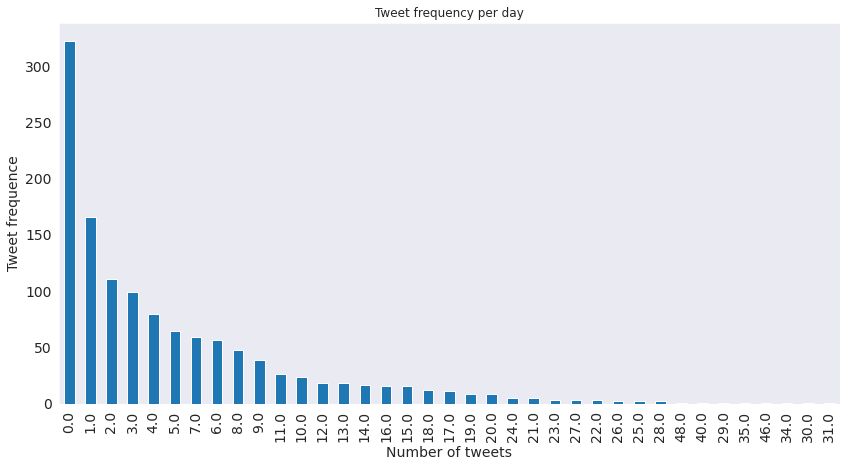

In [66]:
#Tweet frequency per day
merged.tweets_count.value_counts().plot.bar(figsize=(14, 7), fontsize=14)
plt.xlabel("Number of tweets", fontsize=14)
plt.ylabel("Tweet frequence", fontsize=14)
plt.title("Tweet frequency per day")
plt.show()

In [67]:
# Set sentiment classifier
x = []
for row in merged['compound_sentiment']:
    if row > 0.05:
       x.append('Positive')
    elif row < -0.05:
       x.append('Negative')
    else: 
      x.append('Neutral')

merged['sentiment_classifier'] = x

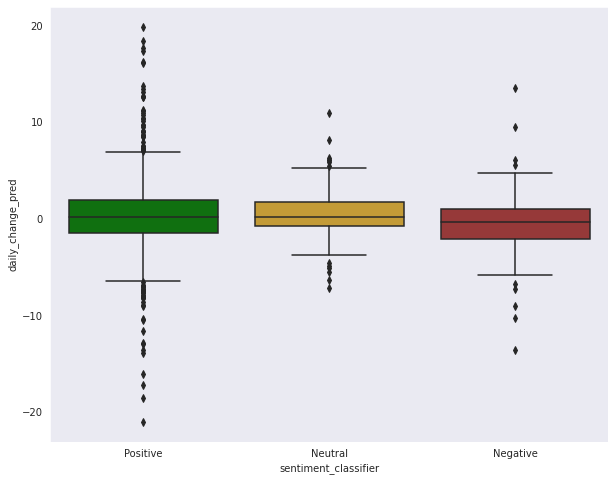

In [68]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=merged, x=merged.sentiment_classifier, y=merged.daily_change_pred, palette=['green','goldenrod','brown'])

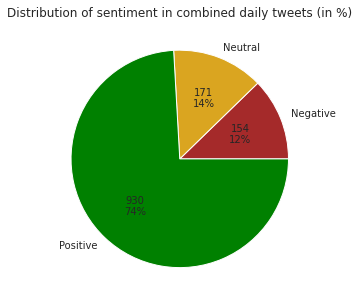

In [69]:
# The distribution of sentiment

def label_function(val):
    return f'{val / 100 * len(merged):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))

merged.groupby('sentiment_classifier').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['brown', 'goldenrod', 'green'], ax=ax1)
plt.title('Distribution of sentiment in combined daily tweets (in %)')
plt.ylabel('')

plt.show()

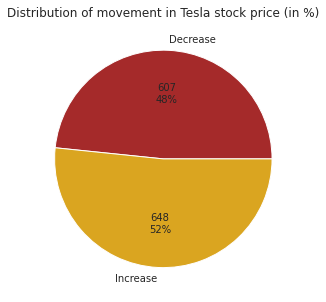

In [70]:
# The distribution of the movement in stock price (increase / decrease)

def label_function(val):
    return f'{val / 100 * len(merged):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))

merged.groupby('change_categorical').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['brown', 'goldenrod'], ax=ax1)
plt.title('Distribution of movement in Tesla stock price (in %)')
plt.ylabel('')

plt.show()

**Convert to pdf**

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py 
from colab_pdf import colab_pdf 
colab_pdf('Tweet_sentiment_and_EDA_on_tweets_and_stocks')